In [1]:
import numpy as np
from matplotlib.path import Path
from matplotlib import pyplot as plt
import pickle

import sys
sys.path.insert(0,'./src/')

from utils import *
from multiply_connected_pipe import *
from pipe_system import PipeSystem
from abstract_pipe import *
from pipe_system.let_index import LetIndex
from multiply_connected_pipe import MultiplyConnectedPipeFromPipeSystem

In [2]:
with open('./exp1/pipes_and_shifts.pickle','rb') as f:
    pipes, shifts = pickle.load(f)

In [3]:
bdr_pipe = BoundaryPipe([BoundaryLet(-5,0,0,1,-1),BoundaryLet(31,0,np.pi,1,1)])
real_pipes = [RealPipe(p,shift_x=shift[0],shift_y=shift[1]) for p,shift in zip(pipes,shifts)]
ps = PipeSystem(real_pipes,bdr_pipe)
pipe = MultiplyConnectedPipeFromPipeSystem(ps)

In [4]:
pipe.build_geometry()

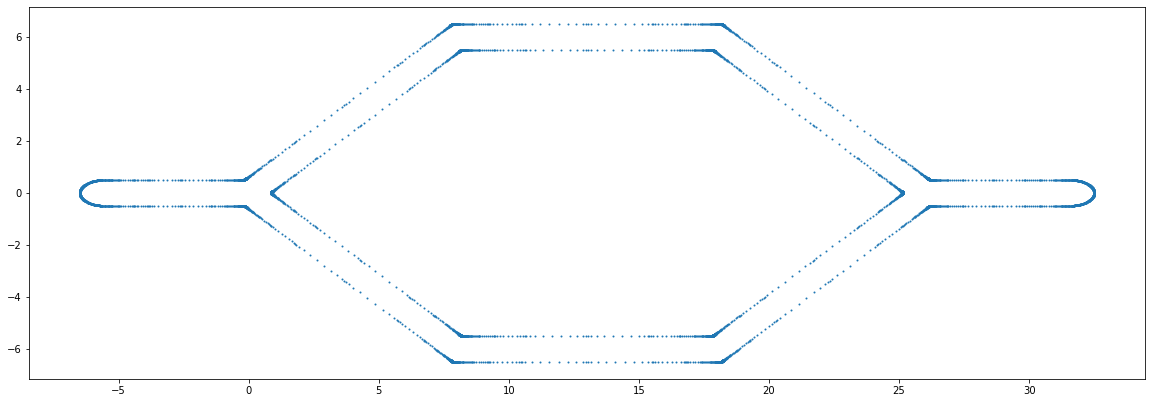

In [5]:
fig,ax = plt.subplots(figsize=(20,10))
ax.set_aspect('equal')
ax.scatter(pipe.t.real, pipe.t.imag,s=1)

This is not correct. 

AttributeError: 'NLets' object has no attribute 'closed_boundary'

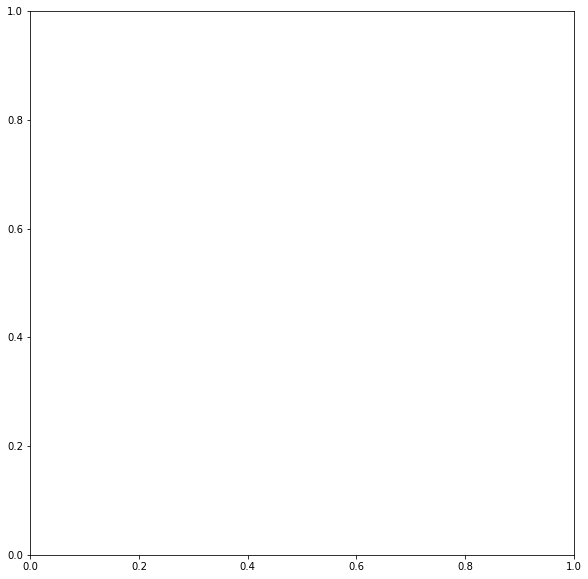

In [6]:
# color = ['r','g','b','y','c','m','k']

# fig,ax = plt.subplots(figsize=(20,10))
# ax.set_aspect('equal')

# for a,i,j,c in zip(range(10),pipes,shifts,color):
#     ax.plot(*(i. + j).T,c=c)
#     for k,let in enumerate(i.lets):
#         ax.text(*(0.6*let.matching_pt + j),f'{k},{let.matching_pt + j}',color=c)
#     ax.text(*j,f'{a}, {j}',color=c)

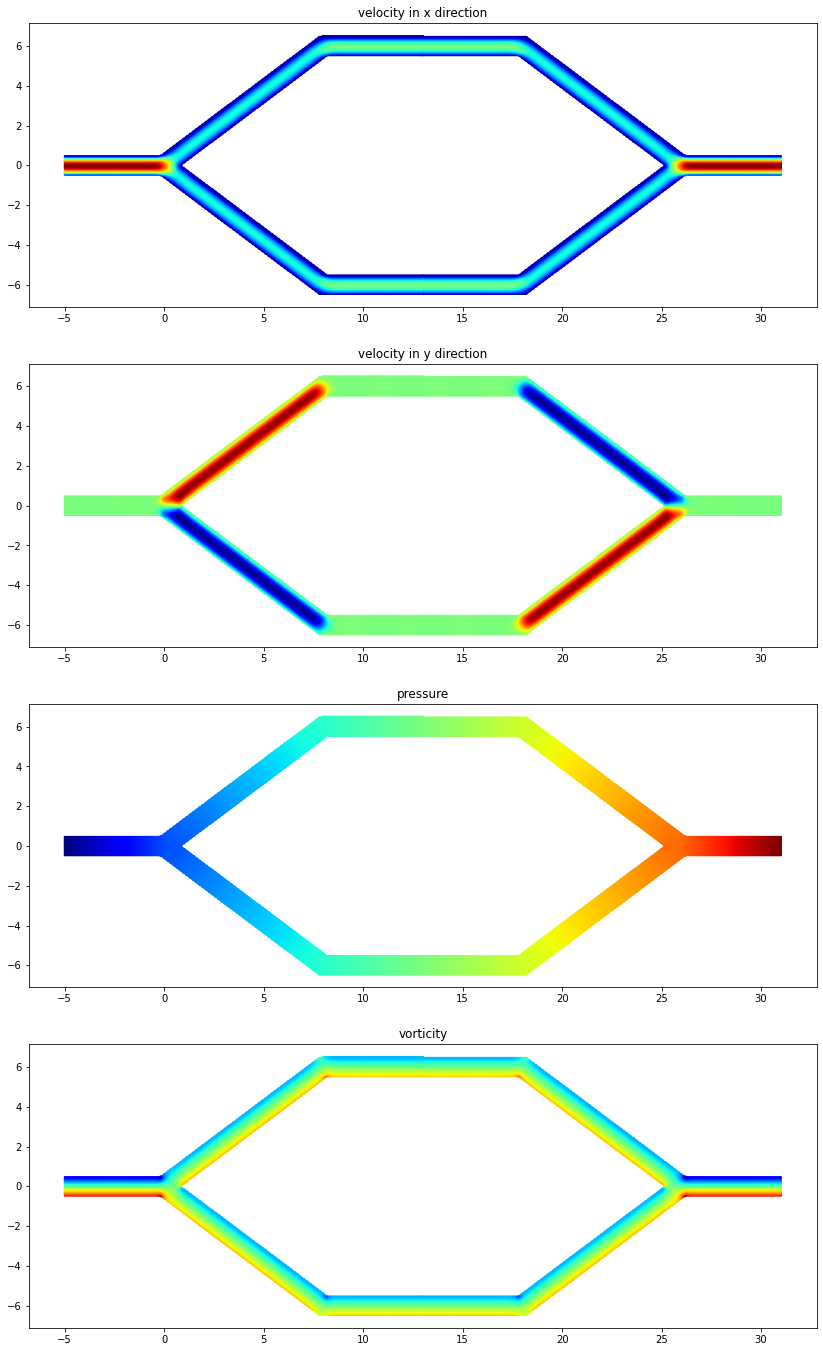

In [6]:
fig,axes = plt.subplots(4,1,figsize=(20,24))

for ax, field, title, in zip(axes, [u_field,v_field,p_field,o_field], ['velocity in x direction','velocity in y direction','pressure','vorticity']):
    ax.set_aspect('equal')
    ax.scatter(xs,ys,c=field,s=1,cmap='jet')
    ax.set_title(title)

In [7]:
pipe.build(tol=1e-8)

In [ ]:
with open('./large_pipe_global_dense.pickle','wb') as f:
    pickle.dump(pipe,f)

In [ ]:
# pipe.build_plotting_data(xs,ys,interior)

In [ ]:
# u_global, v_global, p_global, o_global = pipe.fields_with_fluxes(np.array([1]),0,0)

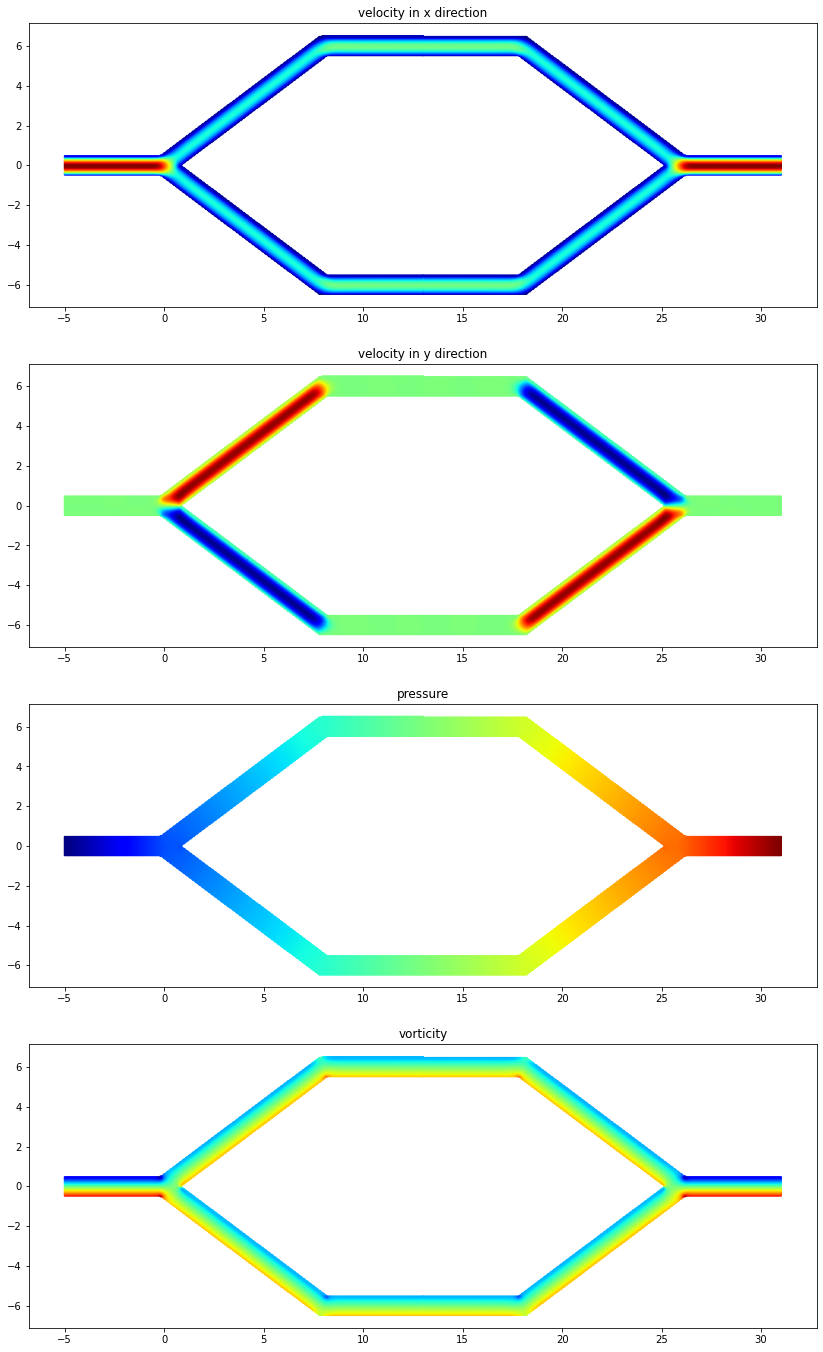

In [ ]:
# fig,axes = plt.subplots(4,1,figsize=(20,24))

# for ax, field, title, in zip(axes, [u_global,v_global,p_global,o_global], ['velocity in x direction','velocity in y direction','pressure','vorticity']):
#     ax.set_aspect('equal')
#     ax.scatter(xs,ys,c=field,s=1,cmap='jet')
#     ax.set_title(title)

In [ ]:
# m = np.full(xs.shape,True)

# for v in ps.vertices:
#     l1, l2 = v.l1, v.l2
#     if l1.atBdr or l2.atBdr:
#         continue
#     l = ps.pipes[l1.pipeIndex].lets[l1.letIndex]
#     x, y = l.x, l.y
#     m = m & ~((np.abs(xs-x) < 2) & (np.abs(ys-y) > 1))
    
# m = m&interior

Text(0.5, 0.98, 'comparing the global solver (using fmm with gmres_tol=1e-5) and combination of the local solvers (using direct matrix multiplication with gmres_tol=1e-10)')

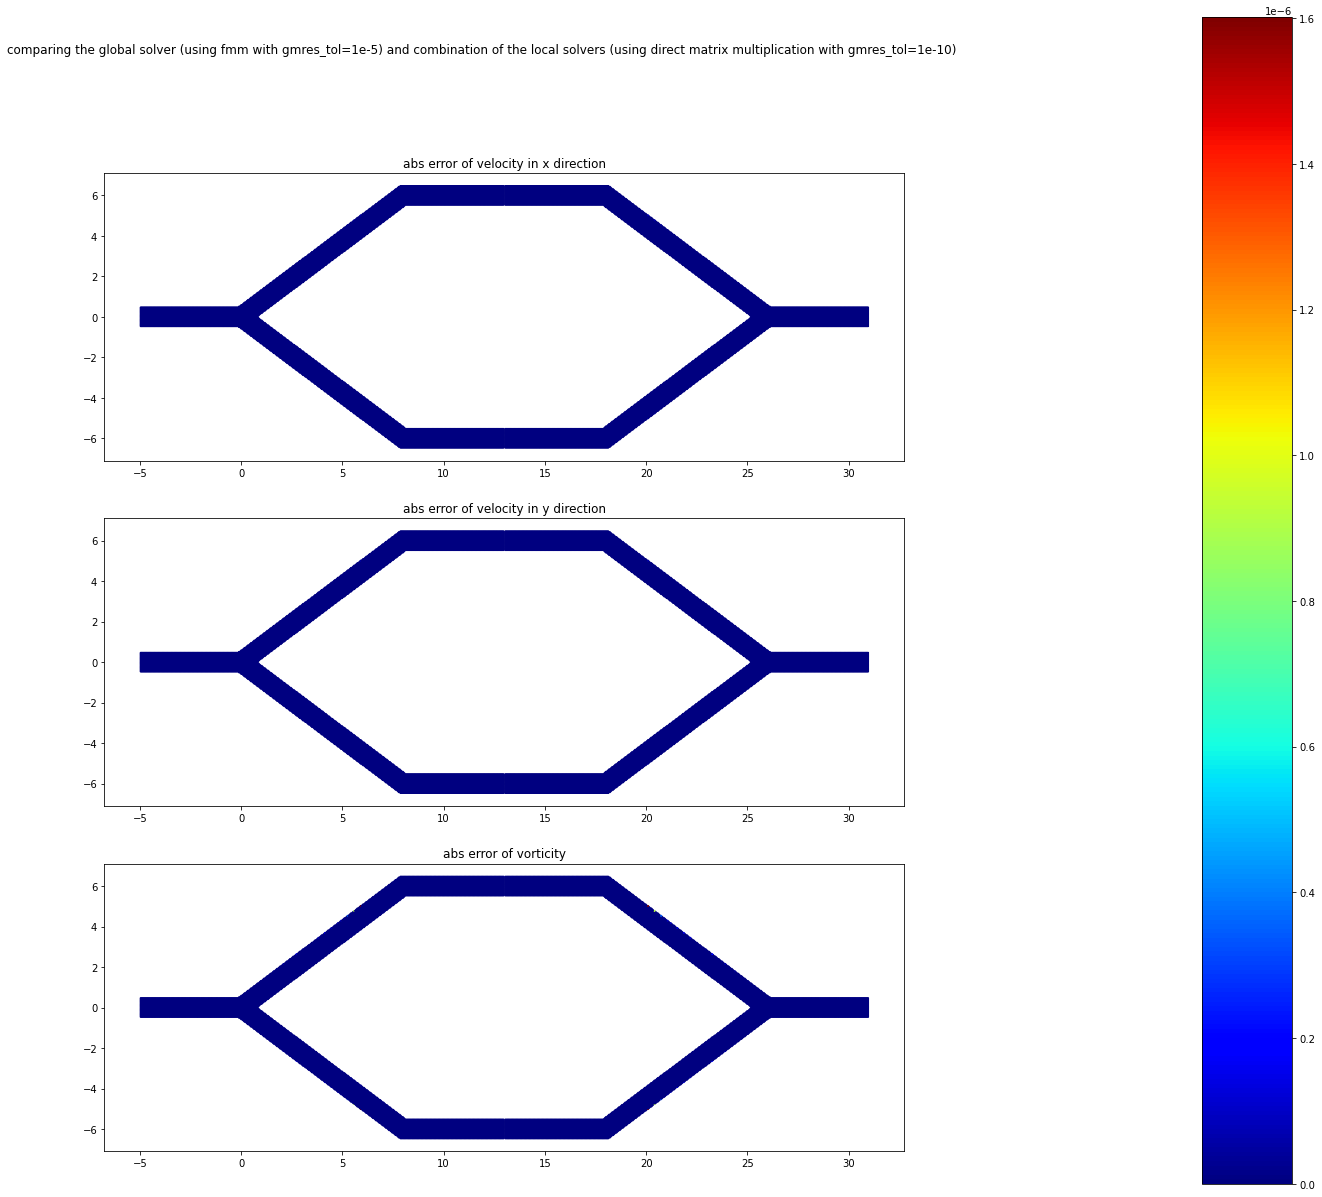

In [ ]:
# fig,axes = plt.subplots(3,1,figsize=(25,18))

# fig.set_facecolor('white')

# mask = interior
# field1 = [u_field,v_field,o_field]
# field2 = [u_global, v_global, o_global]

# vmin = 0
# vmax = np.max([np.max(np.abs(f1[mask]-f2[mask])) for f1,f2 in zip(field1, field2)])

# for ax, f1, f2, title in zip(axes, field1, field2,['velocity in x direction','velocity in y direction','vorticity']):
#     ax.set_aspect('equal')
#     im = ax.scatter(xs[mask],ys[mask],c=np.abs(f1[mask]-f2[mask]),s=1,cmap='jet',vmin=vmin,vmax=vmax)
#     ax.set_title('abs error of '+title)

# fig.subplots_adjust(right=0.9)
# cbar_ax = fig.add_axes([0.9, 0.1, 0.05, 0.9])
# fig.colorbar(im, cax=cbar_ax)
# fig.suptitle('comparing the global solver (using fmm with gmres_tol=1e-5) and combination of the local solvers (using direct matrix multiplication with gmres_tol=1e-10)')
